In [1]:
import keras

# IMDB 리뷰 데이터셋
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


문장의 길이가 다르기 때문에, 길이가 25000인 1차원 리스트로 데이터가 들어가 있다.

In [4]:
print(len(train_input[0]), len(train_input[1]), len(train_input[2]))

218 189 141


실제로 0, 1, 2번째 문장의 길이는 218, 189, 141로 다르다.

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


텍스트 데이터이지만, 숫자로 인코딩 되어 있다.

In [7]:
train_target[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [12]:
from sklearn.model_selection import train_test_split

# 훈련/검증 세트 분리
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [13]:
import numpy as np

# 단어 개수의 분포로 가장 많이 분포가 되어 있는 단어 개수를 파악
lengths = np.array([len(x) for x in train_input])
print(f"평균: {np.mean(lengths)}, 중앙값: {np.median(lengths)}, 최댓값: {np.max(lengths)}, 최솟값: {np.min(lengths)}")

평균: 239.00925, 중앙값: 178.0, 최댓값: 1854, 최솟값: 11


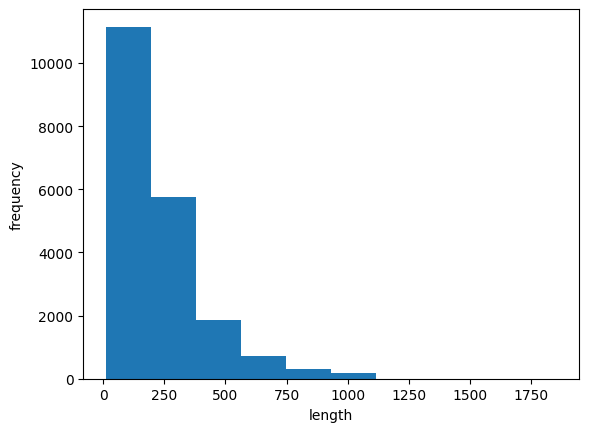

In [14]:
import matplotlib.pyplot as plt

# 단어별 빈도수 그래프
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

극단적으로 긴 문장이 존재한다.\
이것을 해결하기 위해 "패딩 처리"가 필요!

- 패딩 처리: 학습 입력 데이터는 개수가 동일하다. 문장은 개수가 동일하지 않다. - 동일하게 일정 개수만큼 자르는 것
- 어떤 문장은 기준보다 작을 수 있으므로 0으로 채워서 길이를 맞춰준다.

In [26]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape, val_seq.shape)

print(train_seq[0])
print(train_seq[0][-10:])

print(train_seq[5])

(20000, 100) (5000, 100)
[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[  6   2  46   7  14  20  10  10   2 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


0: padding\
1: 시작 토큰 (문장의 시작)\
2: 없는 단어\
3~: 실제 문장, 빈도수가 높은 단어일수록 낮은 숫자

In [30]:
# 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

print(train_oh.shape, val_oh.shape)

for i in range(3):
    print(train_oh[0][i])

(20000, 100, 200) (5000, 100, 200)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

위의 출력의 의미:\
0번째 문장의 0, 1, 2번째 단어는 전체 단어(Tokenizer.word_index 딕셔너리) 중 각각 10, 4, 20번째 단어

In [31]:
train_oh.nbytes  # 크기가 매우 큼

3200000000

In [33]:
# 순환 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100, 200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

### RNN 층

1. 입력 → 은닉 상태를 위한 가중치 행렬
    - 입력 벡터의 차원: 200 (one-hot 벡터)
    - 은닉 유닛 수: 8
    - 200 x 8 = 1600

2. 이전 은닉 상태 → 현재 은닉 상태를 위한 가중치 행렬
    - 은닉 상태의 크기: 8
    - 즉, RNN의 시간 순환 구조에서 내부적으로 사용하는 가중치
    - 8 x 8 = 64

3. bias 벡터
    - 은닉 유닛마다 하나씩 존재
    - 8

### Dense 층
1. 입력 → 출력
    - 입력 유닛: 8개
    - 출력: 1
    - 8 x 1 = 8

2. bias 벡터
    - 출력 유닛마다 하나씩 존재
    - 1

In [ ]:
# 모델 컴파일 (optimizer, loss function, 측정 지표 설정)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 (최상의 모델 저장, 조기종료 설정)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model.fit(train_oh, train_target, epochs=100, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5570 - loss: 0.6793 - val_accuracy: 0.6886 - val_loss: 0.5991
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6987 - loss: 0.5830 - val_accuracy: 0.6998 - val_loss: 0.5741
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7137 - loss: 0.5677 - val_accuracy: 0.7266 - val_loss: 0.5536
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7212 - loss: 0.5528 - val_accuracy: 0.7278 - val_loss: 0.5520
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7243 - loss: 0.5515 - val_accuracy: 0.7244 - val_loss: 0.5567
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7281 - loss: 0.5472 - val_accuracy: 0.7296 - val_loss: 0.5499
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7357 - loss: 0.5371 - val_accuracy: 0.7298 - val_loss: 0.5525
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7331 - loss: 0.5392 - val_accu

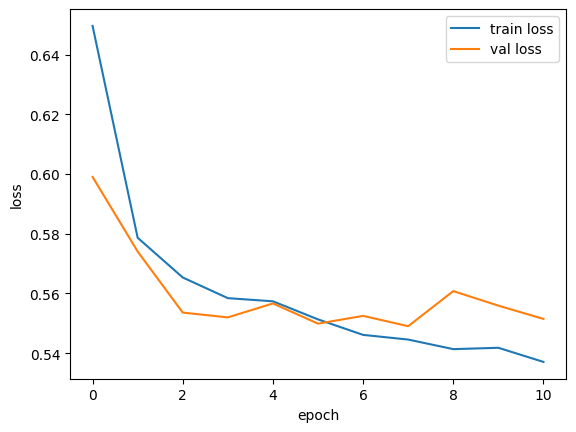

In [42]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 임베딩 층
단어 임베딩, 지정된 크기 만큼의 실수 밀집 벡터로 변환, 벡터는 유의미한 데이터, 학습을 반복하면서 조정... (경사하강법)

In [50]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.imdb.load_data(num_words=500)

# 훈련/검증 세트 분리
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [51]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [52]:
from keras.layers import *

model = keras.Sequential()
model.add(Input(shape=(100,)))
model.add(Embedding(500, 16))  # Embedding: 최대 500개의 단어를 16차원 벡터로 변환
model.add(SimpleRNN(8))  # activation='tanh' -> 기본값, 하이퍼 탄젠트 / 8개의 밀집 벡터로 만듦
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

입력 차원 16

In [53]:
# 모델 컴파일 (optimizer, loss function, 측정 지표 설정)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 콜백 (최상의 모델 저장, 조기종료 설정)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5977 - loss: 0.6608 - val_accuracy: 0.7090 - val_loss: 0.5879
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6012 - loss: 0.6746 - val_accuracy: 0.5478 - val_loss: 0.7032
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6786 - loss: 0.6016 - val_accuracy: 0.7376 - val_loss: 0.5525
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7339 - loss: 0.5486 - val_accuracy: 0.7290 - val_loss: 0.5643
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6685 - loss: 0.6148 - val_accuracy: 0.7360 - val_loss: 0.5516
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7587 - loss: 0.5164 - val_accuracy: 0.6476 - val_loss: 0.6358
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7255 - loss: 0.5494 - val_accuracy: 0.6698 - val_loss: 0.6075
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7259 - loss: 0.5422 - val_accu

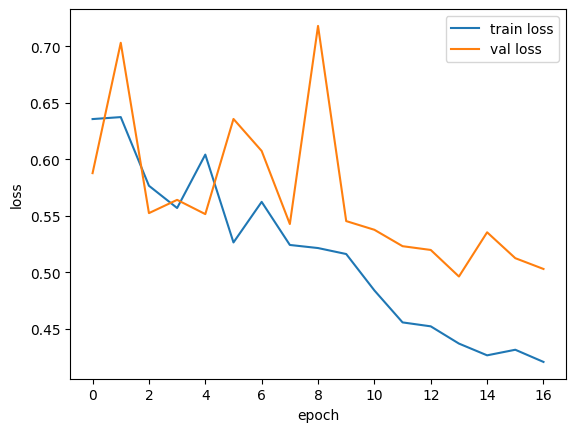

In [55]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()